<a href="https://colab.research.google.com/github/Alenushka2013/Coursera/blob/master/213138_3_7_Pandas_%D0%A0%D0%B0%D0%B7%D0%BC%D0%B8%D0%BD%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
df = pd.read_csv('/content/Ad_click_prediction_train.csv', parse_dates=['DateTime'])

In [8]:
# Сколько всего записей в таблице?
df.shape[0]

463291

In [9]:
# Сколько в файле колонок?
df.shape[1]

15

In [10]:
# За сколько дней представлено данных
df["DateTime"].dt.date.nunique()

6

In [12]:
# Сколько представлено уникальных пользователей?
df.user_id.nunique()

150347

In [13]:
# Сколько рекламных кампаний проводилось? (Колонка campaign_id)
df.campaign_id.nunique()

10

In [16]:
# Сколько различных продуктов рекламировалось в течение кампании с идентификатором 360936
df[df['campaign_id'] == 360936]['product'].nunique()

5

In [21]:
# Пользователь с каким id совершил больше всего кликов? (Колонка is_click)
int(df.groupby('user_id').is_click.sum().idxmax())

252158

In [23]:
# Какая рекламная кампания принесла наибольшее количество кликов?
int(df.groupby('campaign_id').is_click.sum().idxmax())

405490

In [26]:
# Какая рекламная кампания имеет худшую конверсию?
res = df.groupby('campaign_id').is_click.sum() / df.campaign_id.value_counts() * 100
int(res.idxmin())

360936

In [27]:
# Какая рекламная кампания имеет лучшую конверсию?
int(res.idxmax())

405490

In [32]:
# В какой день пользователей было больше всего?
most_users_day = df.groupby(df.DateTime.dt.date).user_id.nunique().idxmax()
print("День с наибольшим количеством пользователей:", most_users_day)

День с наибольшим количеством пользователей: 2017-07-05


In [34]:
# В какой день было большее число кликов?
most_clicks_day = df.groupby(df.DateTime.dt.date).is_click.sum().idxmax()
print("День с наибольшим количеством кликов:", most_clicks_day)

День с наибольшим количеством кликов: 2017-07-03


In [39]:
# В какой час пользователей было больше всего? (Ответ запишите в формате (2001-04-20 14:00:00)
# Оставляем только дату и час
df["hour"] = df["DateTime"].dt.floor("h")

# Группировка по часу и подсчет уникальных пользователей
most_users_hour = df.groupby("hour")["user_id"].nunique().idxmax()
print(most_users_hour.to_pydatetime())

2017-07-04 20:00:00


In [40]:
# В какой час было совершено больше кликов? (Ответ запишите в формате (2001-04-20 14:00:00)

# Фильтруем только клики и считаем их количество по часам
most_clicks_hour = df[df["is_click"] == 1].groupby("hour")["is_click"].count().idxmax()

print(most_clicks_hour)

2017-07-04 20:00:00


In [41]:
# В какой час была наихудшая конверсия?
# Группировка по часу: считаем клики и уникальных пользователей
conversion_by_hour = df.groupby("hour").agg({"is_click": "sum", "user_id": "nunique"})

# Вычисляем конверсию
conversion_by_hour["conversion_rate"] = conversion_by_hour["is_click"] / conversion_by_hour["user_id"]

# Находим час с наименьшей конверсией
worst_conversion_hour = conversion_by_hour["conversion_rate"].idxmin()

# Выводим результат
print(worst_conversion_hour.strftime("%Y-%m-%d %H:%M:%S"))

2017-07-05 02:00:00


In [43]:
# В какой час была наилучшая конверсия?
# Находим час с наибольшей конверсией
best_conversion_hour = conversion_by_hour["conversion_rate"].idxmax()

# Выводим результат
print(best_conversion_hour.strftime("%Y-%m-%d %H:%M:%S"))

2017-07-07 01:00:00


In [45]:
# Чему равно среднее "время жизни" пользователя? Ответ запишите в формате (2 days 03:14:29)

# Группируем по user_id и вычисляем минимальное и максимальное время активности
user_lifetime = df.groupby("user_id")["DateTime"].agg(["min", "max"])

# Вычисляем время жизни пользователя
user_lifetime["lifetime"] = user_lifetime["max"] - user_lifetime["min"]

# Среднее время жизни
mean_lifetime = user_lifetime["lifetime"].mean()

# Вывод в нужном формате
print(str(mean_lifetime))

1 days 03:15:43.289457056


In [48]:
df1 = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/BTC-USD.csv', parse_dates=['Date'])

In [49]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,41077.996094,24615543271
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2747 non-null   datetime64[ns]
 1   Open       2747 non-null   float64       
 2   High       2747 non-null   float64       
 3   Low        2747 non-null   float64       
 4   Close      2747 non-null   float64       
 5   Adj Close  2747 non-null   float64       
 6   Volume     2747 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 150.4 KB


In [70]:
# Какого было значение ma 50 по цене открытия на день 30ого октября 2019 года?
df1["MA_50"] = df1["Open"].rolling(window=50).mean()
ma_50_value = df1.loc[df1["Date"] == "2019-10-30", "MA_50"].values[0]
print(ma_50_value.round(0))

8864.0


In [71]:
# Какого было значение ma 200 по цене открытия на день 2ого мая 2016 года?
df1["MA_200"] = df1["Open"].rolling(window=200).mean()
ma_200_value = df1.loc[df1["Date"] == "2016-05-02", "MA_200"].values[0]
print(ma_200_value.round(0))

397.0


In [73]:
# В какой день ma 200 по цене открытия был максимальным?
max_ma_200_date = df1.loc[df1["MA_200"].idxmax(), "Date"]
print(max_ma_200_date)

2022-02-20 00:00:00


In [74]:
df2 = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/Backery%20Sales2.csv', parse_dates=['datetime'])

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            1741 non-null   datetime64[ns]
 1   day of week         1741 non-null   object        
 2   total               1741 non-null   float64       
 3   place               1741 non-null   object        
 4   angbutter           1741 non-null   float64       
 5   plain bread         1741 non-null   float64       
 6   jam                 1741 non-null   float64       
 7   americano           1741 non-null   float64       
 8   croissant           1741 non-null   float64       
 9   caffe latte         1741 non-null   float64       
 10  tiramisu croissant  1741 non-null   float64       
 11  cacao deep          1741 non-null   float64       
 12  pain au chocolat    1741 non-null   float64       
 13  almond croissant    1741 non-null   float64     

In [75]:
df2.head()

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-10-02 11:58:00,Wed,19300.0,석사동,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-10-02 12:35:00,Wed,15500.0,후평 3동,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2019-10-02 14:16:00,Wed,17000.0,후평 3동,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2019-10-02 14:18:00,Wed,16000.0,후평 2동,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-10-02 15:57:00,Wed,24500.0,동면,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0


month
2019-10    19995.454545
2019-11    20191.111111
2019-12    20530.737705
2020-01    21117.511521
2020-02    20924.104235
2020-03    20525.796178
2020-04    20736.016949
Freq: M, Name: total, dtype: float64


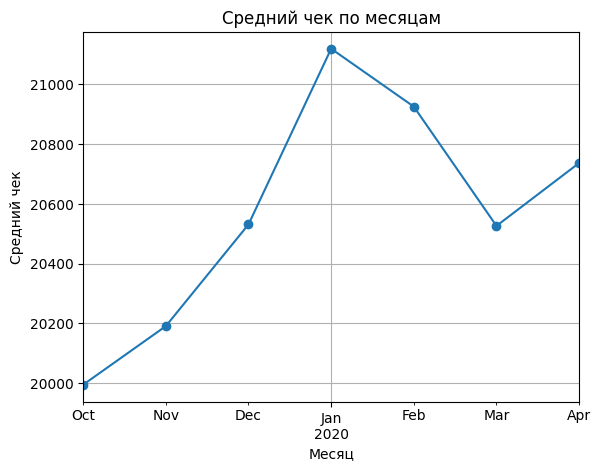

In [89]:
# Меняется ли средний чек в булочной?
import matplotlib.pyplot as plt

# Создаем новый столбец для месяца
df2['month'] = df2['datetime'].dt.to_period('M')

# Группируем по месяцу и считаем среднее значение total_sales для каждого месяца
monthly_avg_check = df2.groupby('month')['total'].mean()

# Выводим результат
print(monthly_avg_check)

# Построим график для визуализации изменения среднего чека по месяцам
monthly_avg_check.plot(kind='line', title='Средний чек по месяцам', marker='o')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.grid(True)
plt.show()

month
2019-10    12.0
2019-11    10.0
2019-12    14.0
2020-01    16.0
2020-02    26.0
2020-03    23.0
2020-04    22.0
Freq: M, Name: gateau chocolat, dtype: float64


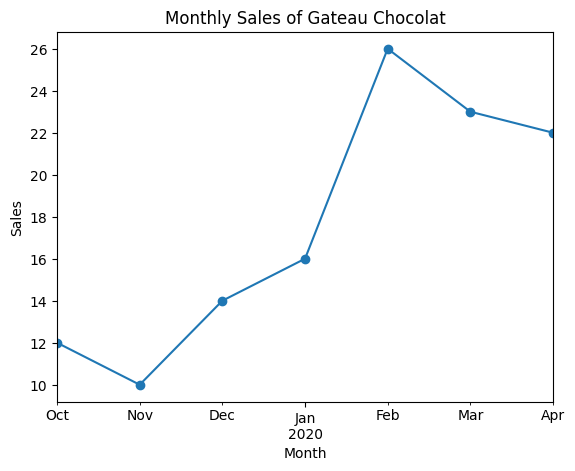

In [79]:
# Растет ли спрос на шоколадные пирожные (gateau chocolat)

# Группируем данные по дате и суммируем количество проданных шоколадных пирожных (gateau chocolat)
df2['datetime'] = pd.to_datetime(df2['datetime'])  # Убедитесь, что datetime в правильном формате

# Если мы хотим проанализировать спрос по месяцам
df2['month'] = df2['datetime'].dt.to_period('M')  # Группируем по месяцам

# Группируем по месяцам и суммируем продажи шоколадных пирожных
monthly_sales_chocolate = df2.groupby('month')['gateau chocolat'].sum()

# Выводим результат
print(monthly_sales_chocolate)

# Можно также нарисовать график для визуализации тренда
import matplotlib.pyplot as plt

monthly_sales_chocolate.plot(kind='line', title='Monthly Sales of Gateau Chocolat', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

month
2019-10    26.0
2019-11    36.0
2019-12    27.0
2020-01    23.0
2020-02    29.0
2020-03    31.0
2020-04    15.0
Freq: M, Name: jam, dtype: float64


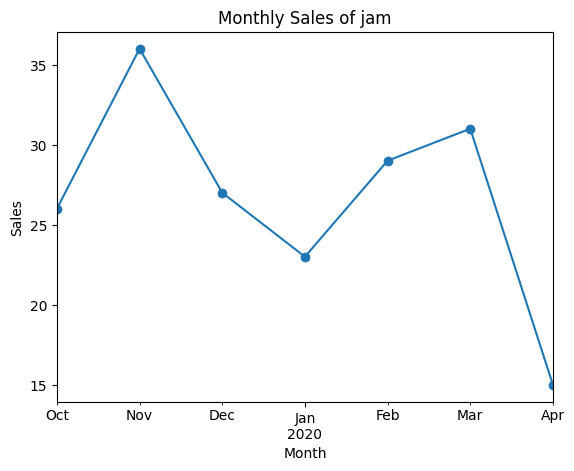

In [80]:
# Растет ли спрос на джем (jam)
# Группируем данные по дате и суммируем количество проданного джема (jam)
df2['datetime'] = pd.to_datetime(df2['datetime'])  # Убедитесь, что datetime в правильном формате

# Если мы хотим проанализировать спрос по месяцам
df2['month'] = df2['datetime'].dt.to_period('M')  # Группируем по месяцам

# Группируем по месяцам и суммируем продажи джема
monthly_sales_chocolate = df2.groupby('month')['jam'].sum()

# Выводим результат
print(monthly_sales_chocolate)

# Можно также нарисовать график для визуализации тренда
import matplotlib.pyplot as plt

monthly_sales_chocolate.plot(kind='line', title='Monthly Sales of jam', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [90]:
df3 = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/unemployment.csv')

In [91]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

In [92]:
df3.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [98]:
# В какой стране безработица за все года в среднем была максимальной?
df3['mean'] = df3.iloc[:, 3:].mean(axis = 1)

In [99]:
df3

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11,7.225667
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28,11.157667
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84,4.961667
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53,5.493667
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82,16.518333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Samoa,WSM,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,...,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84,5.962667
231,"Yemen, Rep.",YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,...,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57,11.909333
232,South Africa,ZAF,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56,28.175333
233,Zambia,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,...,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03,12.968667


In [102]:
df3[df3['mean'] == df3['mean'].max()]['Country Name'].values[0]

'Lesotho'

In [103]:
# В какой стране безработица за все года в среднем была минимальной?
df3[df3['mean'] == df3['mean'].min()]['Country Name'].values[0]

'Qatar'